# Import libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed
from pandas import read_csv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split

In [2]:
# Import fastai
from fastai.vision import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('/content/drive/MyDrive/emotics_annotations_clean_v7.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,filename,folder,image_size,original_database,person,body_bbox,annotations_categories,annotations_continuous,gender,age,shape_x,shape_y,x1,y1,x2,y2,valence,arousal,dominance,categories,n_cat,cats,mapping_cats,category
0,0,0,COCO_val2014_000000562243.jpg,mscoco/images,"(array([[640]], dtype=uint16), array([[640]], ...","(array(['mscoco'], dtype='<U6'), array([[(arra...","(array([[ 86, 58, 564, 628]], dtype=uint16), ...",[[ 86 58 564 628]],"(array([[array(['Disconnection'], dtype='<U13'...","(array([[5]], dtype=uint8), array([[3]], dtype...",Male,Adult,640.0,640.0,86.0,58.0,564.0,628.0,5.0,3.0,9.0,"Disconnection,Doubt/Confusion",2.0,"['Disconnection', 'Doubt/Confusion']","['Disgust', 'Fear']",Fear
1,1,1,COCO_train2014_000000288841.jpg,mscoco/images,"(array([[640]], dtype=uint16), array([[480]], ...","(array(['mscoco'], dtype='<U6'), array([[(arra...","(array([[485, 149, 605, 473]], dtype=uint16), ...",[[485 149 605 473]],"(array([[array(['Anticipation'], dtype='<U12')...","(array([[6]], dtype=uint8), array([[4]], dtype...",Male,Adult,640.0,480.0,485.0,149.0,605.0,473.0,6.0,4.0,7.0,Anticipation,1.0,['Anticipation'],['Surprise'],Surprise
2,2,2,COCO_val2014_000000558171.jpg,mscoco/images,"(array([[640]], dtype=uint16), array([[480]], ...","(array(['mscoco'], dtype='<U6'), array([[(arra...","(array([[305, 92, 461, 465]], dtype=uint16), ...",[[305 92 461 465]],"(array([[array(['Engagement'], dtype='<U10'),\...","(array([[7]], dtype=uint8), array([[8]], dtype...",Male,Teenager,640.0,480.0,305.0,92.0,461.0,465.0,7.0,8.0,8.0,"Engagement,Excitement,Happiness",3.0,"['Engagement', 'Excitement', 'Happiness']","['Happy', 'Neutral']",Neutral
3,3,3,COCO_train2014_000000369575.jpg,mscoco/images,"(array([[480]], dtype=uint16), array([[640]], ...","(array(['mscoco'], dtype='<U6'), array([[(arra...","(array([[221, 63, 448, 372]], dtype=uint16), ...",[[221 63 448 372]],"(array([[array(['Aversion'], dtype='<U8'),\n ...","(array([[8]], dtype=uint8), array([[9]], dtype...",Male,Kid,480.0,640.0,221.0,63.0,448.0,372.0,8.0,9.0,8.0,"Aversion,Pleasure",2.0,"['Aversion', 'Pleasure']","['Disgust', 'Happy']",Disgust
4,4,4,COCO_train2014_000000213009.jpg,mscoco/images,"(array([[500]], dtype=uint16), array([[333]], ...","(array(['mscoco'], dtype='<U6'), array([[(arra...","(array([[ 44, 143, 150, 288]], dtype=uint16), ...",[[ 44 143 150 288]],"(array([[array(['Confidence'], dtype='<U10'),\...","(array([[7]], dtype=uint8), array([[9]], dtype...",Male,Adult,500.0,333.0,44.0,143.0,150.0,288.0,7.0,9.0,10.0,"Confidence,Excitement",2.0,"['Confidence', 'Excitement']",['Happy'],Happy


In [42]:
df_fastai = df[["filename","folder","category"]]
print(df_fastai)

                              filename           folder  category
0        COCO_val2014_000000562243.jpg    mscoco/images      Fear
1      COCO_train2014_000000288841.jpg    mscoco/images  Surprise
2        COCO_val2014_000000558171.jpg    mscoco/images   Neutral
3      COCO_train2014_000000369575.jpg    mscoco/images   Disgust
4      COCO_train2014_000000213009.jpg    mscoco/images     Happy
...                                ...              ...       ...
23701  COCO_train2014_000000175368.jpg    mscoco/images     Happy
23702    COCO_val2014_000000514083.jpg    mscoco/images     Happy
23703       frame_k7fb824vh221kl3j.jpg  framesdb/images   Neutral
23704    COCO_val2014_000000244665.jpg    mscoco/images   Neutral
23705    COCO_val2014_000000244665.jpg    mscoco/images  Surprise

[23706 rows x 3 columns]


In [43]:
df_fastai.folder

0          mscoco/images
1          mscoco/images
2          mscoco/images
3          mscoco/images
4          mscoco/images
              ...       
23701      mscoco/images
23702      mscoco/images
23703    framesdb/images
23704      mscoco/images
23705      mscoco/images
Name: folder, Length: 23706, dtype: object

In [44]:
df_fastai['name'] = df_fastai['folder'] + '/' + df_fastai['filename']
df_fastai.drop(columns=['folder','filename'], axis=1, inplace=True)
print(df_fastai)

       category                                           name
0          Fear    mscoco/images/COCO_val2014_000000562243.jpg
1      Surprise  mscoco/images/COCO_train2014_000000288841.jpg
2       Neutral    mscoco/images/COCO_val2014_000000558171.jpg
3       Disgust  mscoco/images/COCO_train2014_000000369575.jpg
4         Happy  mscoco/images/COCO_train2014_000000213009.jpg
...         ...                                            ...
23701     Happy  mscoco/images/COCO_train2014_000000175368.jpg
23702     Happy    mscoco/images/COCO_val2014_000000514083.jpg
23703   Neutral     framesdb/images/frame_k7fb824vh221kl3j.jpg
23704   Neutral    mscoco/images/COCO_val2014_000000244665.jpg
23705  Surprise    mscoco/images/COCO_val2014_000000244665.jpg

[23706 rows x 2 columns]


In [46]:
df_fastai = df_fastai[['name','category']]
print(df_fastai)

                                                name  category
0        mscoco/images/COCO_val2014_000000562243.jpg      Fear
1      mscoco/images/COCO_train2014_000000288841.jpg  Surprise
2        mscoco/images/COCO_val2014_000000558171.jpg   Neutral
3      mscoco/images/COCO_train2014_000000369575.jpg   Disgust
4      mscoco/images/COCO_train2014_000000213009.jpg     Happy
...                                              ...       ...
23701  mscoco/images/COCO_train2014_000000175368.jpg     Happy
23702    mscoco/images/COCO_val2014_000000514083.jpg     Happy
23703     framesdb/images/frame_k7fb824vh221kl3j.jpg   Neutral
23704    mscoco/images/COCO_val2014_000000244665.jpg   Neutral
23705    mscoco/images/COCO_val2014_000000244665.jpg  Surprise

[23706 rows x 2 columns]


In [47]:
import os.path

In [48]:
df_final = pd.DataFrame()
path = '/content/drive/MyDrive/EMOTIC DATASET/emotic/'
for index, row in df_fastai.iterrows():
  if os.path.isfile(path+row['name']):
    df_final = df_final.append(row)
  else:
    print('No hay na')


Se han truncado las últimas 5000 líneas del flujo de salida.
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na
No hay na

In [50]:
df_final = df_final[['name','category']]
df_final = df_final.reset_index()
df_final.drop(columns='index', axis=1, inplace=True)
df_final.head()

,name,category
0,mscoco/images/COCO_train2014_000000462955.jpg,Surprise
1,mscoco/images/COCO_train2014_000000144608.jpg,Happy
2,emodb_small/images/ebpsbjqzfhd7efh00i.jpg,Sad
3,emodb_small/images/ebpsbjqzfhd7efh00i.jpg,Sad
4,emodb_small/images/ebpsbjqzfhd7efh00i.jpg,Sad


In [51]:
df_final.shape

(10351, 2)

In [31]:
df_final['dummy_cats'] = df_final['categories'].str.split(',')
print(df_final)

                                                name  ...                               dummy_cats
0      mscoco/images/COCO_train2014_000000462955.jpg  ...        [Anticipation, Engagement, Peace]
1      mscoco/images/COCO_train2014_000000144608.jpg  ...                     [Fatigue, Happiness]
2          emodb_small/images/ebpsbjqzfhd7efh00i.jpg  ...  [Pain, Sadness, Sensitivity, Suffering]
3          emodb_small/images/ebpsbjqzfhd7efh00i.jpg  ...           [Sadness, Suffering, Sympathy]
4          emodb_small/images/ebpsbjqzfhd7efh00i.jpg  ...               [Fear, Sadness, Suffering]
...                                              ...  ...                                      ...
10346     framesdb/images/frame_bvarawszysrqkcuf.jpg  ...    [Anticipation, Engagement, Happiness]
10347     framesdb/images/frame_bvarawszysrqkcuf.jpg  ...     [Confidence, Engagement, Excitement]
10348     framesdb/images/frame_cihmig8jwxfwzifv.jpg  ...                             [Engagement]
10349     

In [ ]:
msk = np.random.rand(len(df_final)) < 0.8
df_train = df_final[msk]
df_test = df_final[~msk]
print(df_train)

                                                name                          categories
1      mscoco/images/COCO_train2014_000000144608.jpg                   Fatigue,Happiness
2          emodb_small/images/ebpsbjqzfhd7efh00i.jpg  Pain,Sadness,Sensitivity,Suffering
3          emodb_small/images/ebpsbjqzfhd7efh00i.jpg          Sadness,Suffering,Sympathy
4          emodb_small/images/ebpsbjqzfhd7efh00i.jpg              Fear,Sadness,Suffering
5         framesdb/images/frame_k245twaqc30i5imc.jpg                          Engagement
...                                              ...                                 ...
10345      emodb_small/images/ft4hfz5gtsfl7wwi45.jpg                           Annoyance
10346     framesdb/images/frame_bvarawszysrqkcuf.jpg   Anticipation,Engagement,Happiness
10348     framesdb/images/frame_cihmig8jwxfwzifv.jpg                          Engagement
10349     framesdb/images/frame_cihmig8jwxfwzifv.jpg             Anticipation,Engagement
10350     framesdb/im

In [ ]:
print(df_test)

                                                name                                         categories
0      mscoco/images/COCO_train2014_000000462955.jpg                      Anticipation,Engagement,Peace
8         framesdb/images/frame_kuxvwgw2wheq7szc.jpg               Anticipation,Disquietment,Engagement
24        framesdb/images/frame_7nseu023ccmqaj3p.jpg                         Engagement,Happiness,Peace
32        framesdb/images/frame_08cmg83x4uc6vay4.jpg                              Confidence,Engagement
36        framesdb/images/frame_3jwi6nrvfphi4lp6.jpg                                       Disquietment
...                                              ...                                                ...
10335     framesdb/images/frame_9l86b1cj6u0ysrq7.jpg                             Aversion,Disconnection
10337         ade20k/images/sun_awfqvsqstlvpdgwq.jpg                    Confidence,Excitement,Happiness
10342     framesdb/images/frame_fwxrk1awxnxn3osc.jpg            

In [ ]:
df_train.to_csv('df_train')
df_test.to_csv('df_test')

In [58]:
df_final.to_csv('df_final.csv')

# 1. Load data

In [9]:
df_final = pd.read_csv('/content/drive/MyDrive/df_final.csv', index_col=0)
print(df_final)

                                                name  category
0      mscoco/images/COCO_train2014_000000462955.jpg  Surprise
1      mscoco/images/COCO_train2014_000000144608.jpg     Happy
2          emodb_small/images/ebpsbjqzfhd7efh00i.jpg       Sad
3          emodb_small/images/ebpsbjqzfhd7efh00i.jpg       Sad
4          emodb_small/images/ebpsbjqzfhd7efh00i.jpg       Sad
...                                              ...       ...
10346     framesdb/images/frame_bvarawszysrqkcuf.jpg     Happy
10347     framesdb/images/frame_bvarawszysrqkcuf.jpg     Happy
10348     framesdb/images/frame_cihmig8jwxfwzifv.jpg   Neutral
10349     framesdb/images/frame_cihmig8jwxfwzifv.jpg  Surprise
10350     framesdb/images/frame_k7fb824vh221kl3j.jpg   Neutral

[10351 rows x 2 columns]


In [6]:
df_train = pd.read_csv('df_train.csv', index_col=None)
df_test = pd.read_csv('df_test.csv', index_col=None)
df_train = df_train.drop(columns='Unnamed: 0')
df_test = df_test.drop(columns='Unnamed: 0')
print(df_test)

                                               name                                         categories
0     mscoco/images/COCO_train2014_000000462955.jpg                      Anticipation,Engagement,Peace
1        framesdb/images/frame_kuxvwgw2wheq7szc.jpg               Anticipation,Disquietment,Engagement
2        framesdb/images/frame_7nseu023ccmqaj3p.jpg                         Engagement,Happiness,Peace
3        framesdb/images/frame_08cmg83x4uc6vay4.jpg                              Confidence,Engagement
4        framesdb/images/frame_3jwi6nrvfphi4lp6.jpg                                       Disquietment
...                                             ...                                                ...
2017     framesdb/images/frame_9l86b1cj6u0ysrq7.jpg                             Aversion,Disconnection
2018         ade20k/images/sun_awfqvsqstlvpdgwq.jpg                    Confidence,Excitement,Happiness
2019     framesdb/images/frame_fwxrk1awxnxn3osc.jpg                      

In [10]:
# Load data
path = '/content/drive/MyDrive/EMOTIC DATASET/emotic/'
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_df(path, df=df_final,
                              valid_pct=0.2, ds_tfms=tfms, 
                              size=224, bs=32).normalize(imagenet_stats)

In [7]:
# Load data
path = '/content/drive/MyDrive/EMOTIC DATASET/emotic/'
tfms = get_transforms(do_flip=False)
data_train = ImageDataBunch.from_df(path, df=df_train,
                              valid_pct=0.2, ds_tfms=tfms, 
                              size=224, bs=32).normalize(imagenet_stats)
data_test = ImageDataBunch.from_df(path, df=df_test, 
                              ds_tfms=tfms,
                              size=224, bs=32).normalize(imagenet_stats)

In [11]:
# Show classes
data.classes

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [12]:
print(len(data.classes))

7


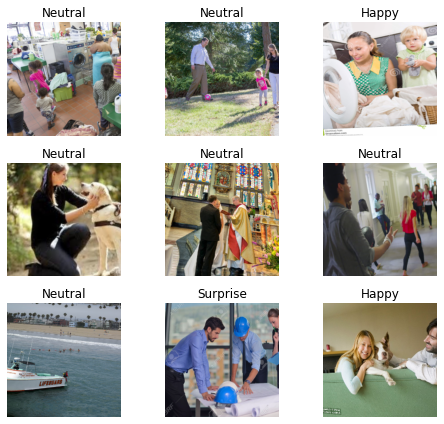

In [13]:
# Show samples of data
data.show_batch(rows=3, figsize=(7,6))

# 2. Train the model

In [18]:
# Initialize learner
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
# Configure learner with new data and freeze conv layers
learn.data = data
learn.freeze()

In [ ]:
# Find learning rate
learn.model_dir = "/content/models"
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
# Set learning rate
lr = 1e-2

In [ ]:
# Train 5 epochs
learn.fit_one_cycle(5, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,5.667777,4.599235,0.265107,1:59:19


KeyboardInterrupt: ignored

In [ ]:
# Save model
learn.save("score-7385")

In [ ]:
# Unfreeze conv layers
learn.unfreeze()

In [ ]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Set learning rate
lr = 1e-4

In [ ]:
# Train 5 epochs
learn.fit_one_cycle(5, max_lr=slice(lr/100,lr))

In [ ]:
# Save model
learn.save("score-7551")

# 3.   Evaluate results

In [ ]:
# Mostrar muestras peor classificadas
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
# Show confusion matrix
interp.plot_confusion_matrix(figsize=(30,30), dpi=60)

In [ ]:
# Show most confused classes
interp.most_confused(min_val=2)